# Idea

Read all the csv files containing the features + their importance score and assign ranks for the topk for each label

In [2]:
from pathlib import Path

import numpy as np
import pandas as pd

import sys
repo_base_path = Path("./../../").resolve()

output_dir = repo_base_path / "feature_selection" / "ablation_study" / "net_results"

assert str(repo_base_path).endswith("csg_is"), f"{repo_base_path} is not a valid path to the CSG_IS repository" 

sys.path.append(str(repo_base_path))

from py_dataset import get_all_files_df
from py_dataset import read_in_files
from py_dataset import feature_plotting
from py_dataset import feature_selection

In [3]:
files = list(output_dir.glob("*.csv"))
files

[PosixPath('/home/<User>/repos/csg_is/feature_selection/ablation_study/net_results/network_data_Heqing_device2_240s_featurescores.csv'),
 PosixPath('/home/<User>/repos/csg_is/feature_selection/ablation_study/net_results/network_data_Heqing_device2_20s_featurescores.csv'),
 PosixPath('/home/<User>/repos/csg_is/feature_selection/ablation_study/net_results/network_data_Heqing_device2_60s_featurescores.csv'),
 PosixPath('/home/<User>/repos/csg_is/feature_selection/ablation_study/net_results/network_data_Heqing_device2_40s_featurescores.csv'),
 PosixPath('/home/<User>/repos/csg_is/feature_selection/ablation_study/net_results/network_data_Heqing_device2_480s_featurescores.csv'),
 PosixPath('/home/<User>/repos/csg_is/feature_selection/ablation_study/net_results/network_data_Heqing_device2_120s_featurescores.csv'),
 PosixPath('/home/<User>/repos/csg_is/feature_selection/ablation_study/net_results/network_data_Heqing_device2_960s_featurescores.csv')]

In [5]:
import os

dfs = []
for file in files:
    infos = file.stem.split("_")

    df = pd.read_csv(str(file))
    df["data_source"] = "_".join(infos[0:2])
    df["device"] = "_".join(infos[2:4])
    df["time_window"] = infos[4]

    dfs.append(df)

df = pd.concat(dfs)
df

,chi2,f_classif,mutual_info_classif,feature,label,data_source,device,time_window
0,0.097974,1.669831,0.015339,(OLD) PacketCount,1_normal,network_data,Heqing_device2,240s
1,0.000972,0.015097,0.050335,(OLD) TotalLength,1_normal,network_data,Heqing_device2,240s
2,0.031145,0.618628,0.061577,(OLD) AverageLength,1_normal,network_data,Heqing_device2,240s
3,0.037402,0.601843,0.001733,(OLD) MedianLength,1_normal,network_data,Heqing_device2,240s
4,0.104834,2.247179,0.023067,(OLD) MinLength,1_normal,network_data,Heqing_device2,240s
...,...,...,...,...,...,...,...,...
184,0.000942,0.134317,0.064250,SecondDerivativeInterPacketInterval,9_xmrig,network_data,Heqing_device2,960s
185,0.786602,17.351090,0.204395,AverageBandwidth,9_xmrig,network_data,Heqing_device2,960s
186,0.316270,7.011385,0.235825,VarianceBandwidth,9_xmrig,network_data,Heqing_device2,960s
187,0.015556,0.139354,0.000000,MaxBandwidth,9_xmrig,network_data,Heqing_device2,960s


In [9]:
len(df) / len(df["time_window"].unique())

201.85714285714286

In [14]:
print(df["device"].unique())
print(df["data_source"].unique())

df = df.drop(columns=["device", "data_source"], errors="ignore")

df

['network_data']


,chi2,f_classif,mutual_info_classif,feature,label,time_window
0,0.097974,1.669831,0.015339,(OLD) PacketCount,1_normal,240s
1,0.000972,0.015097,0.050335,(OLD) TotalLength,1_normal,240s
2,0.031145,0.618628,0.061577,(OLD) AverageLength,1_normal,240s
3,0.037402,0.601843,0.001733,(OLD) MedianLength,1_normal,240s
4,0.104834,2.247179,0.023067,(OLD) MinLength,1_normal,240s
...,...,...,...,...,...,...
184,0.000942,0.134317,0.064250,SecondDerivativeInterPacketInterval,9_xmrig,960s
185,0.786602,17.351090,0.204395,AverageBandwidth,9_xmrig,960s
186,0.316270,7.011385,0.235825,VarianceBandwidth,9_xmrig,960s
187,0.015556,0.139354,0.000000,MaxBandwidth,9_xmrig,960s


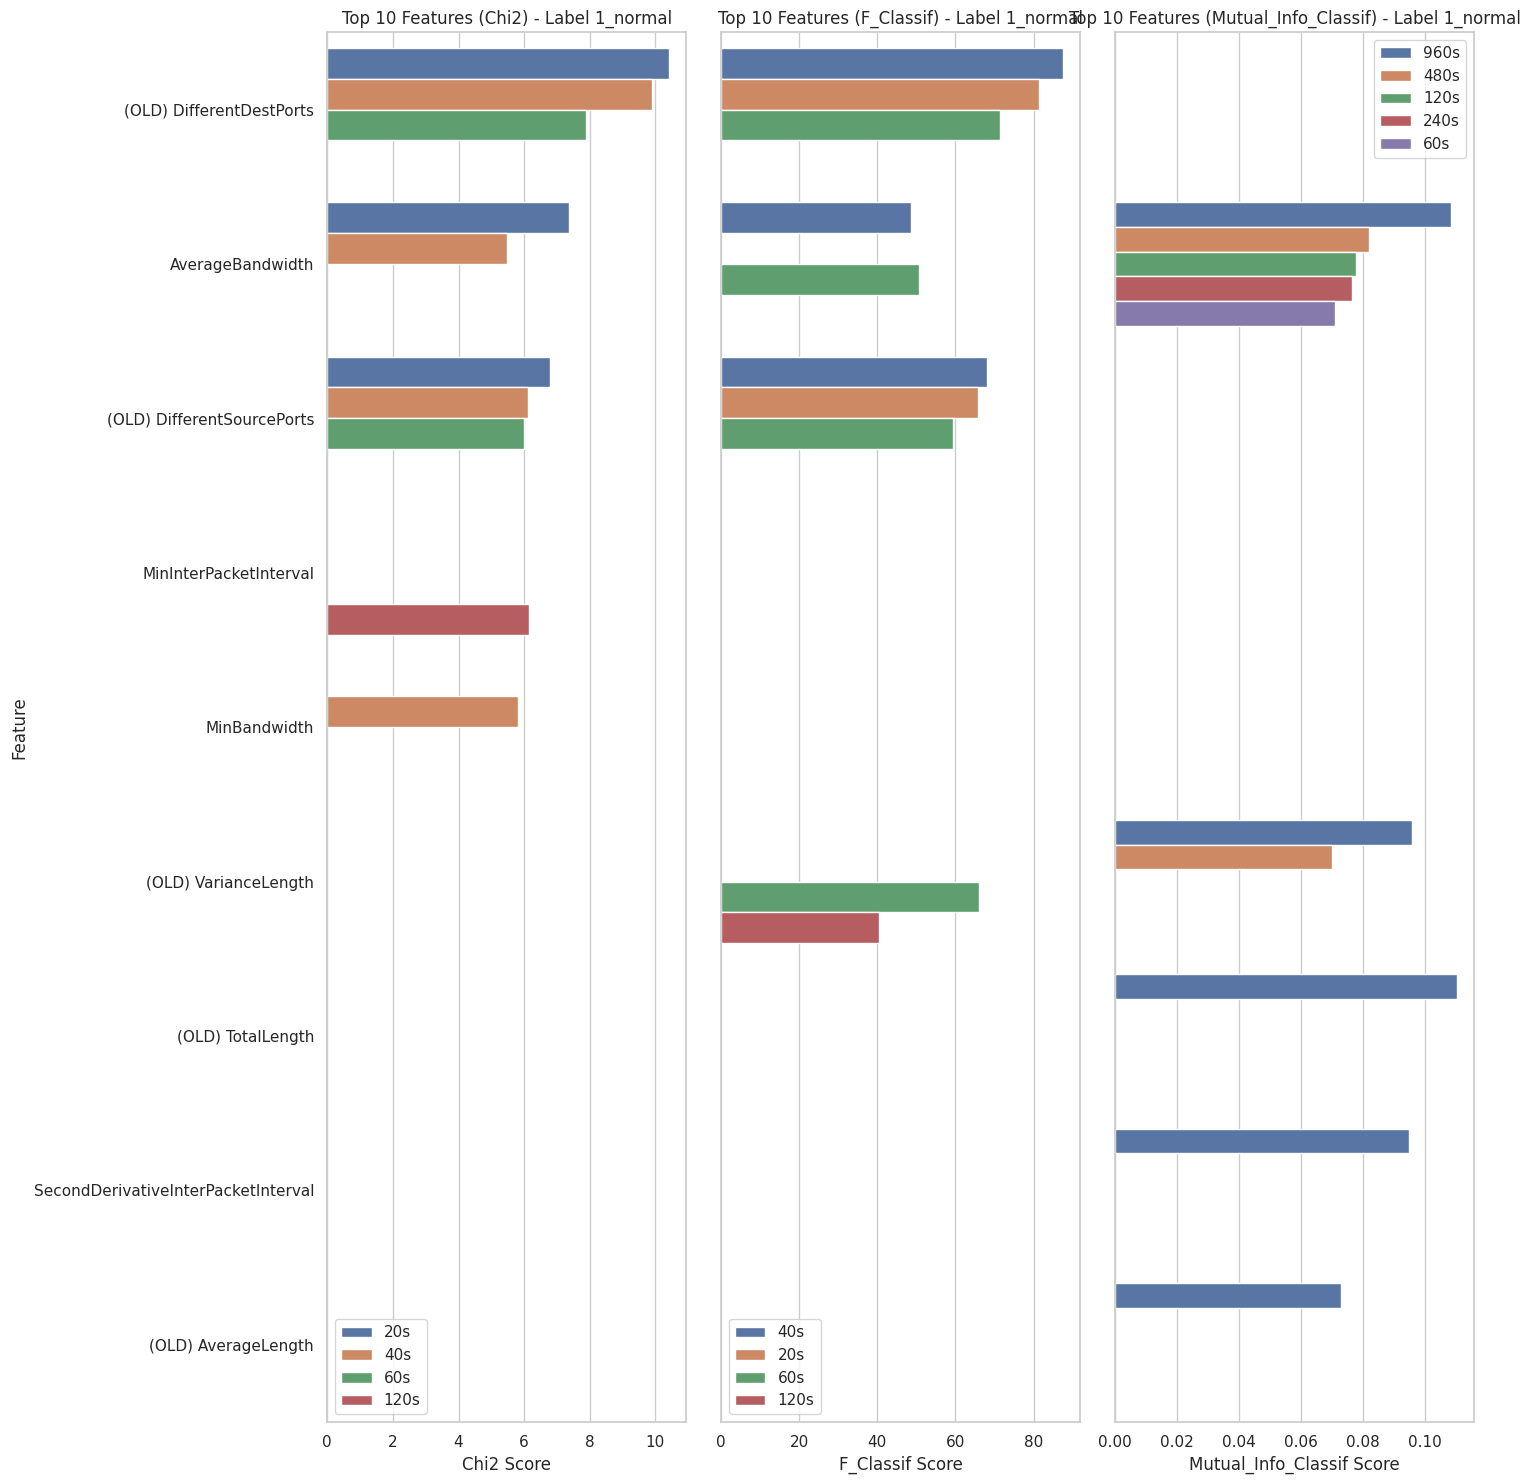

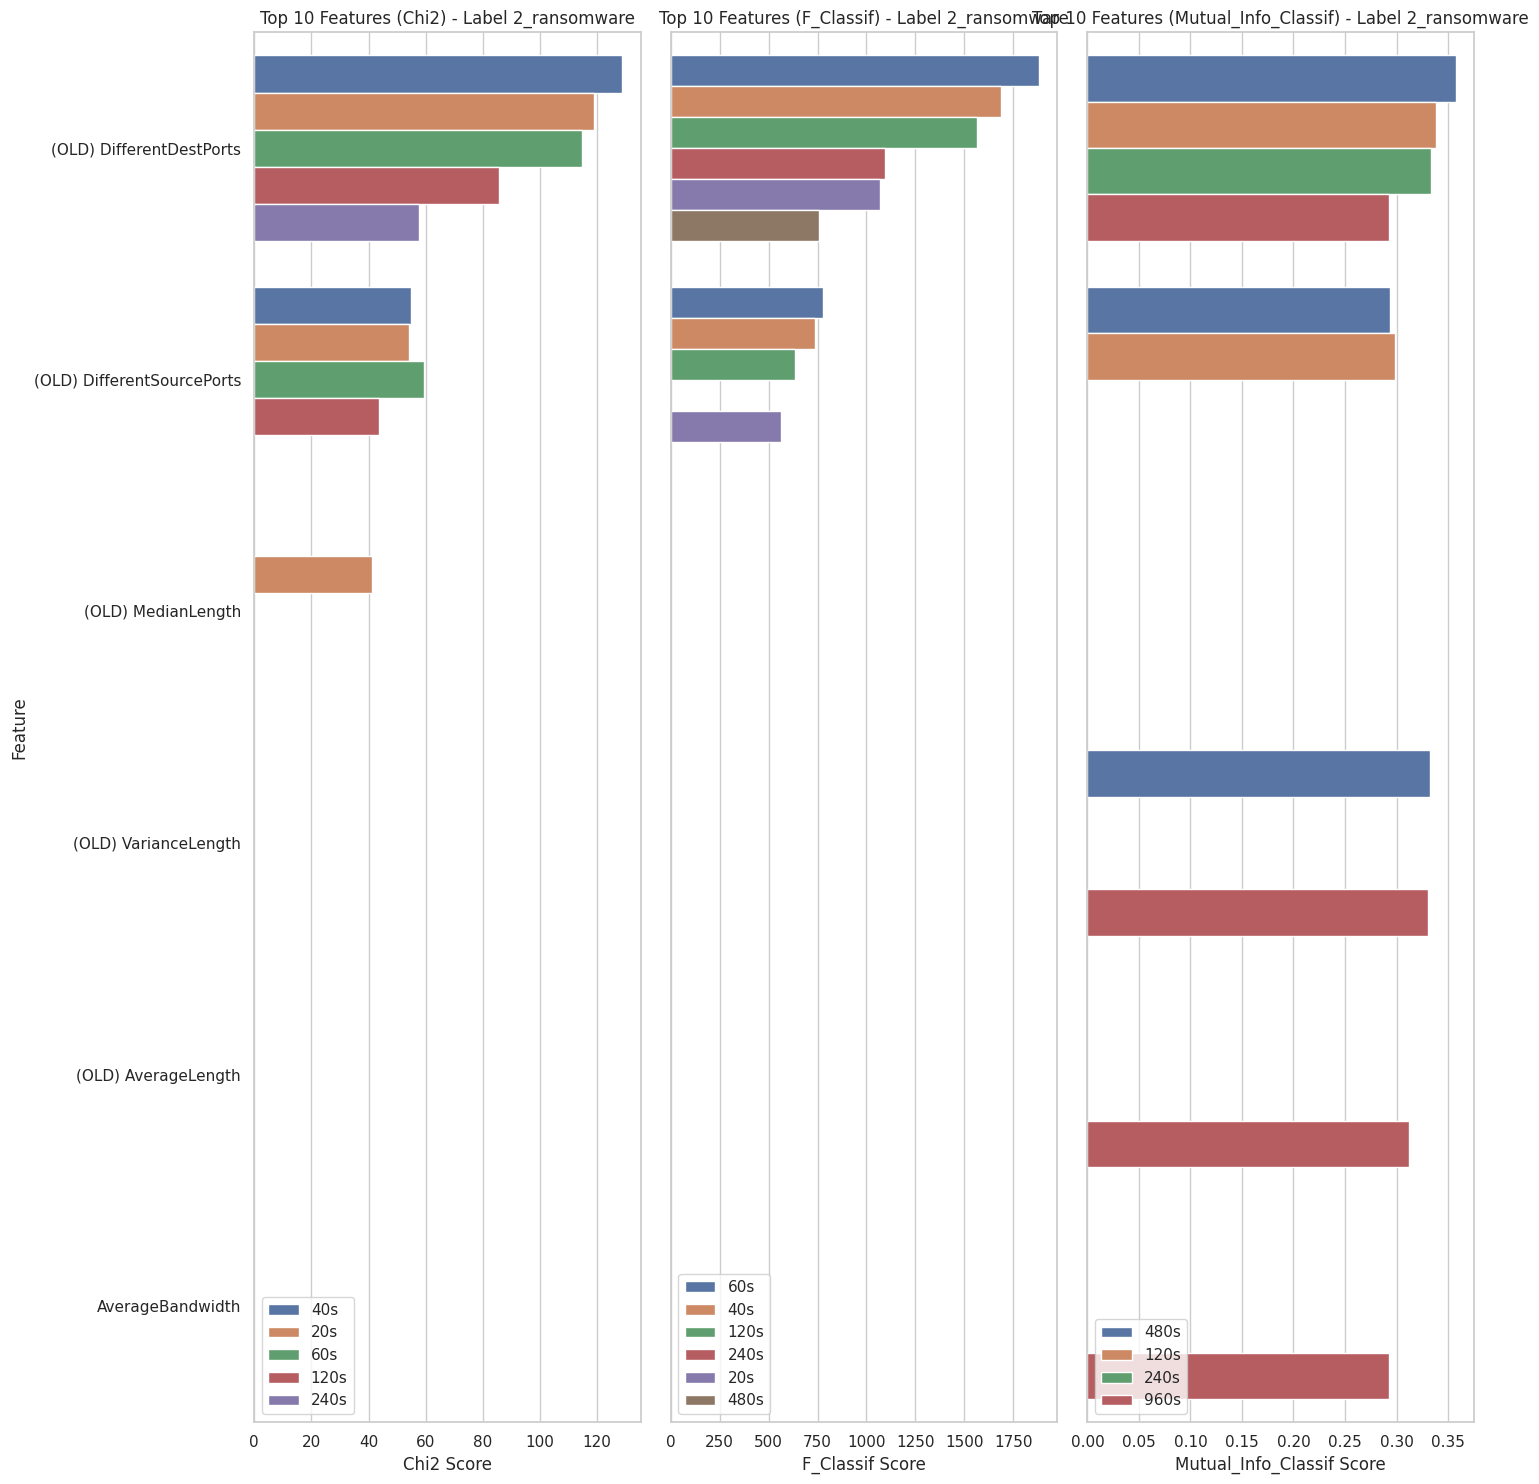

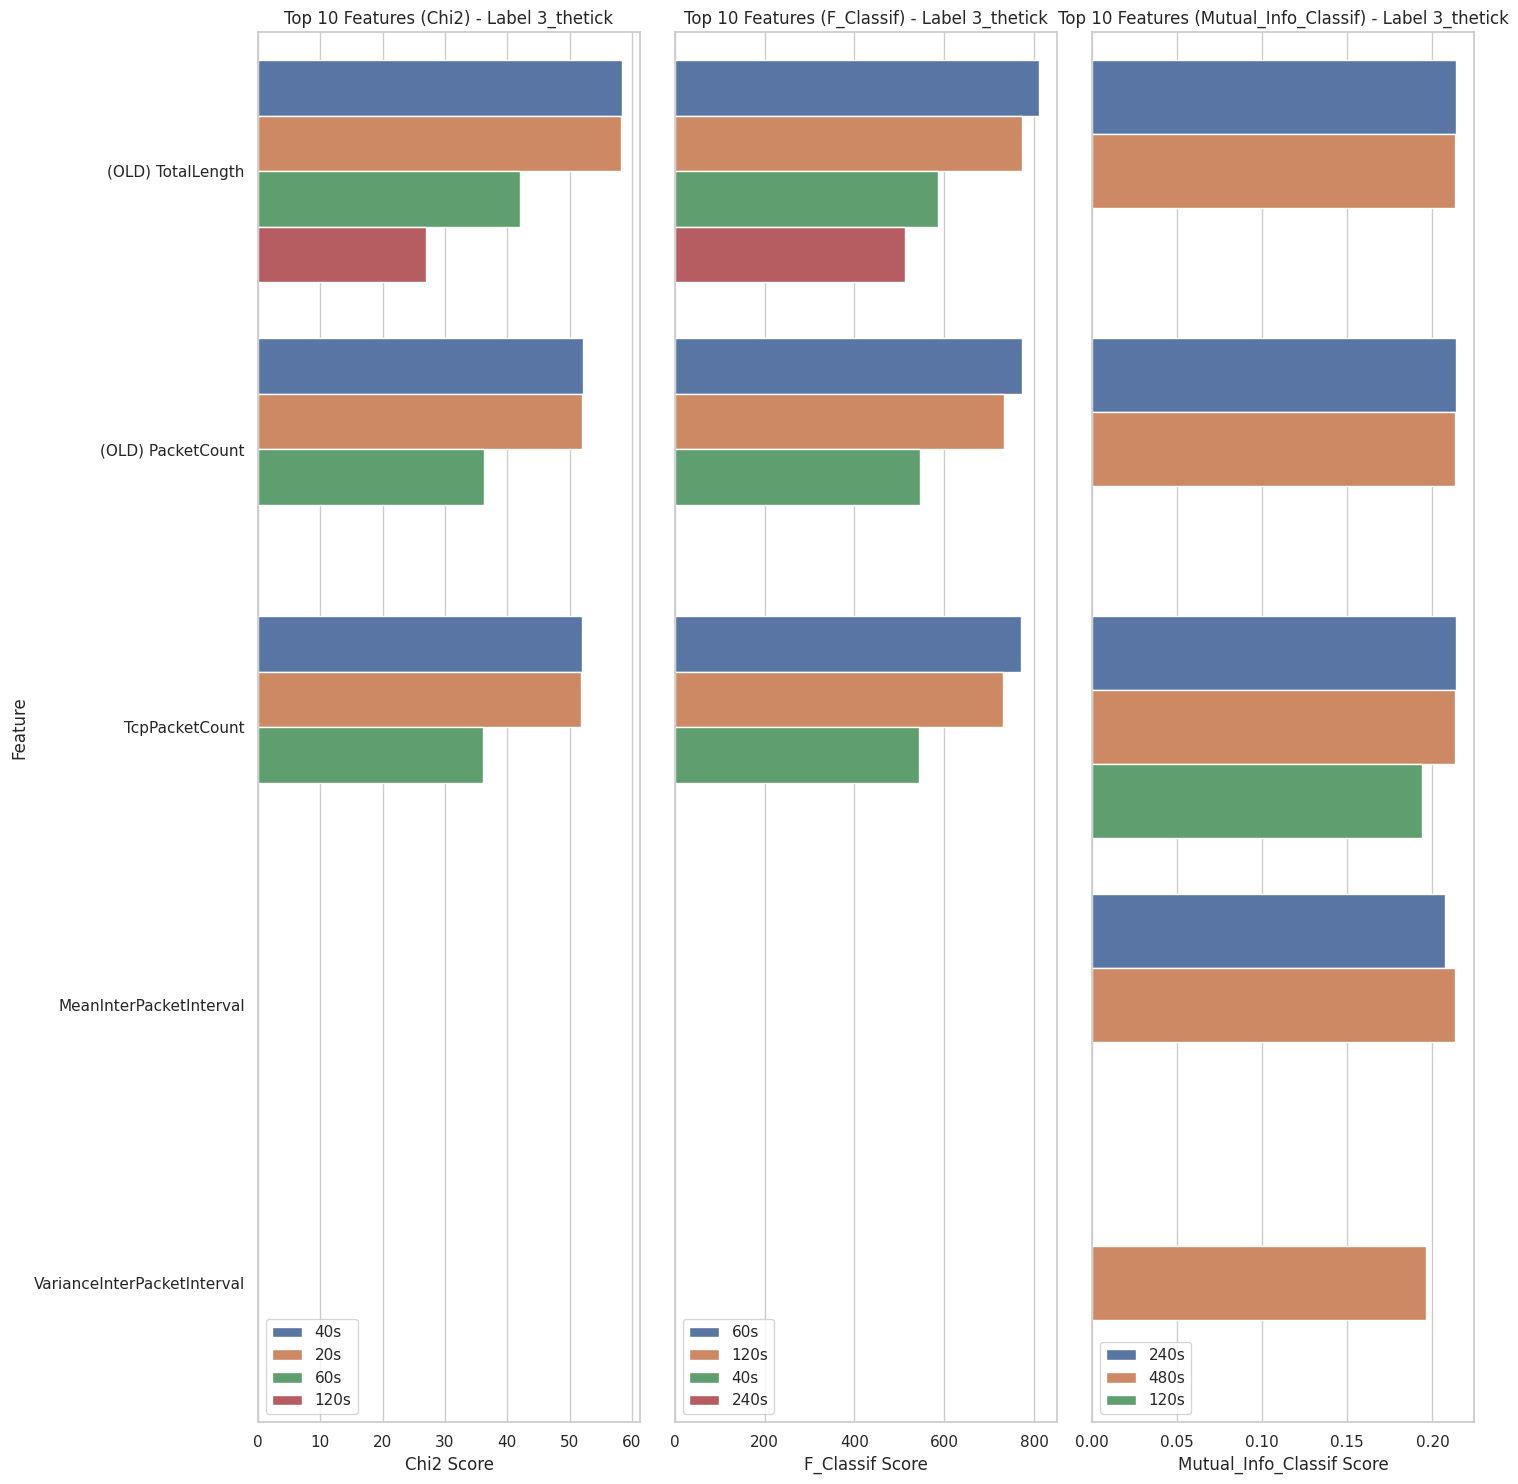

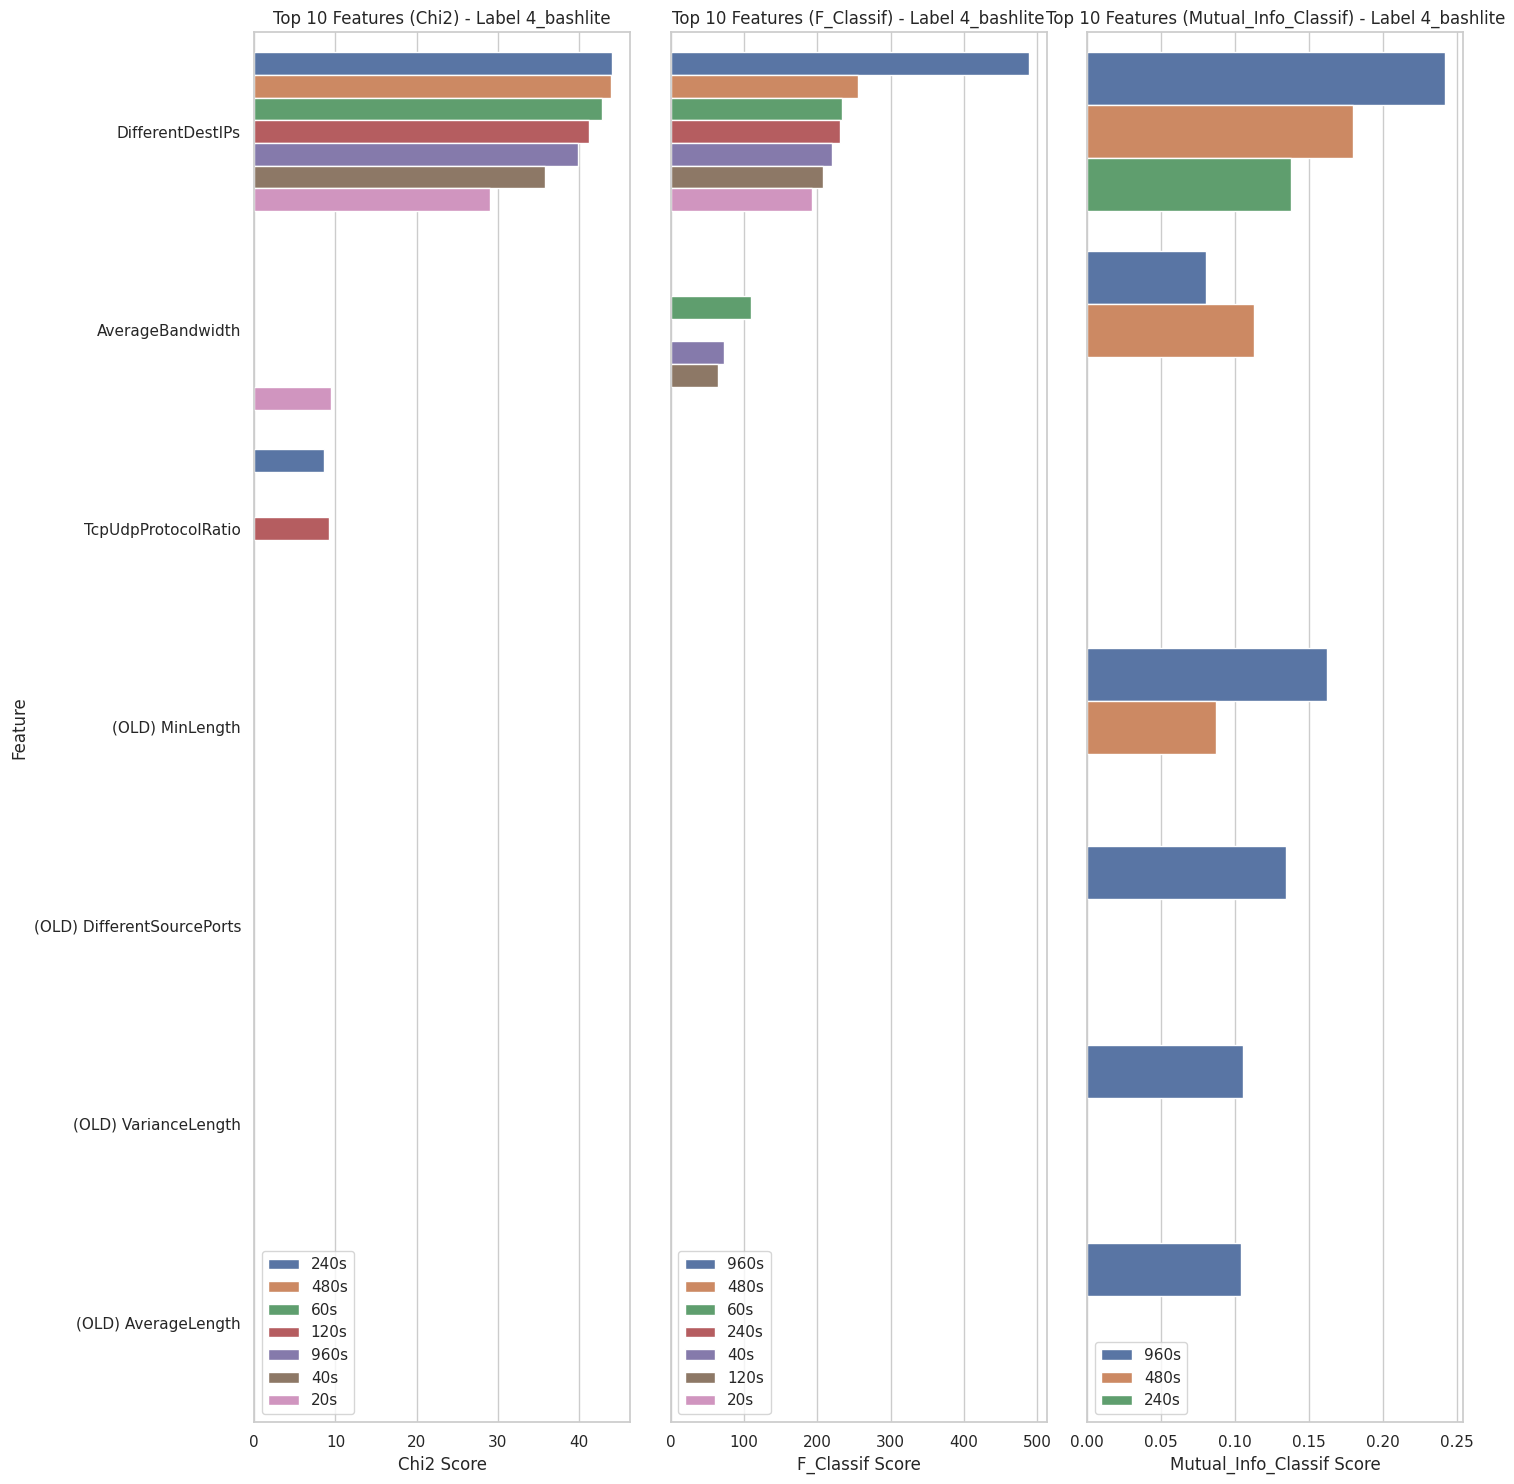

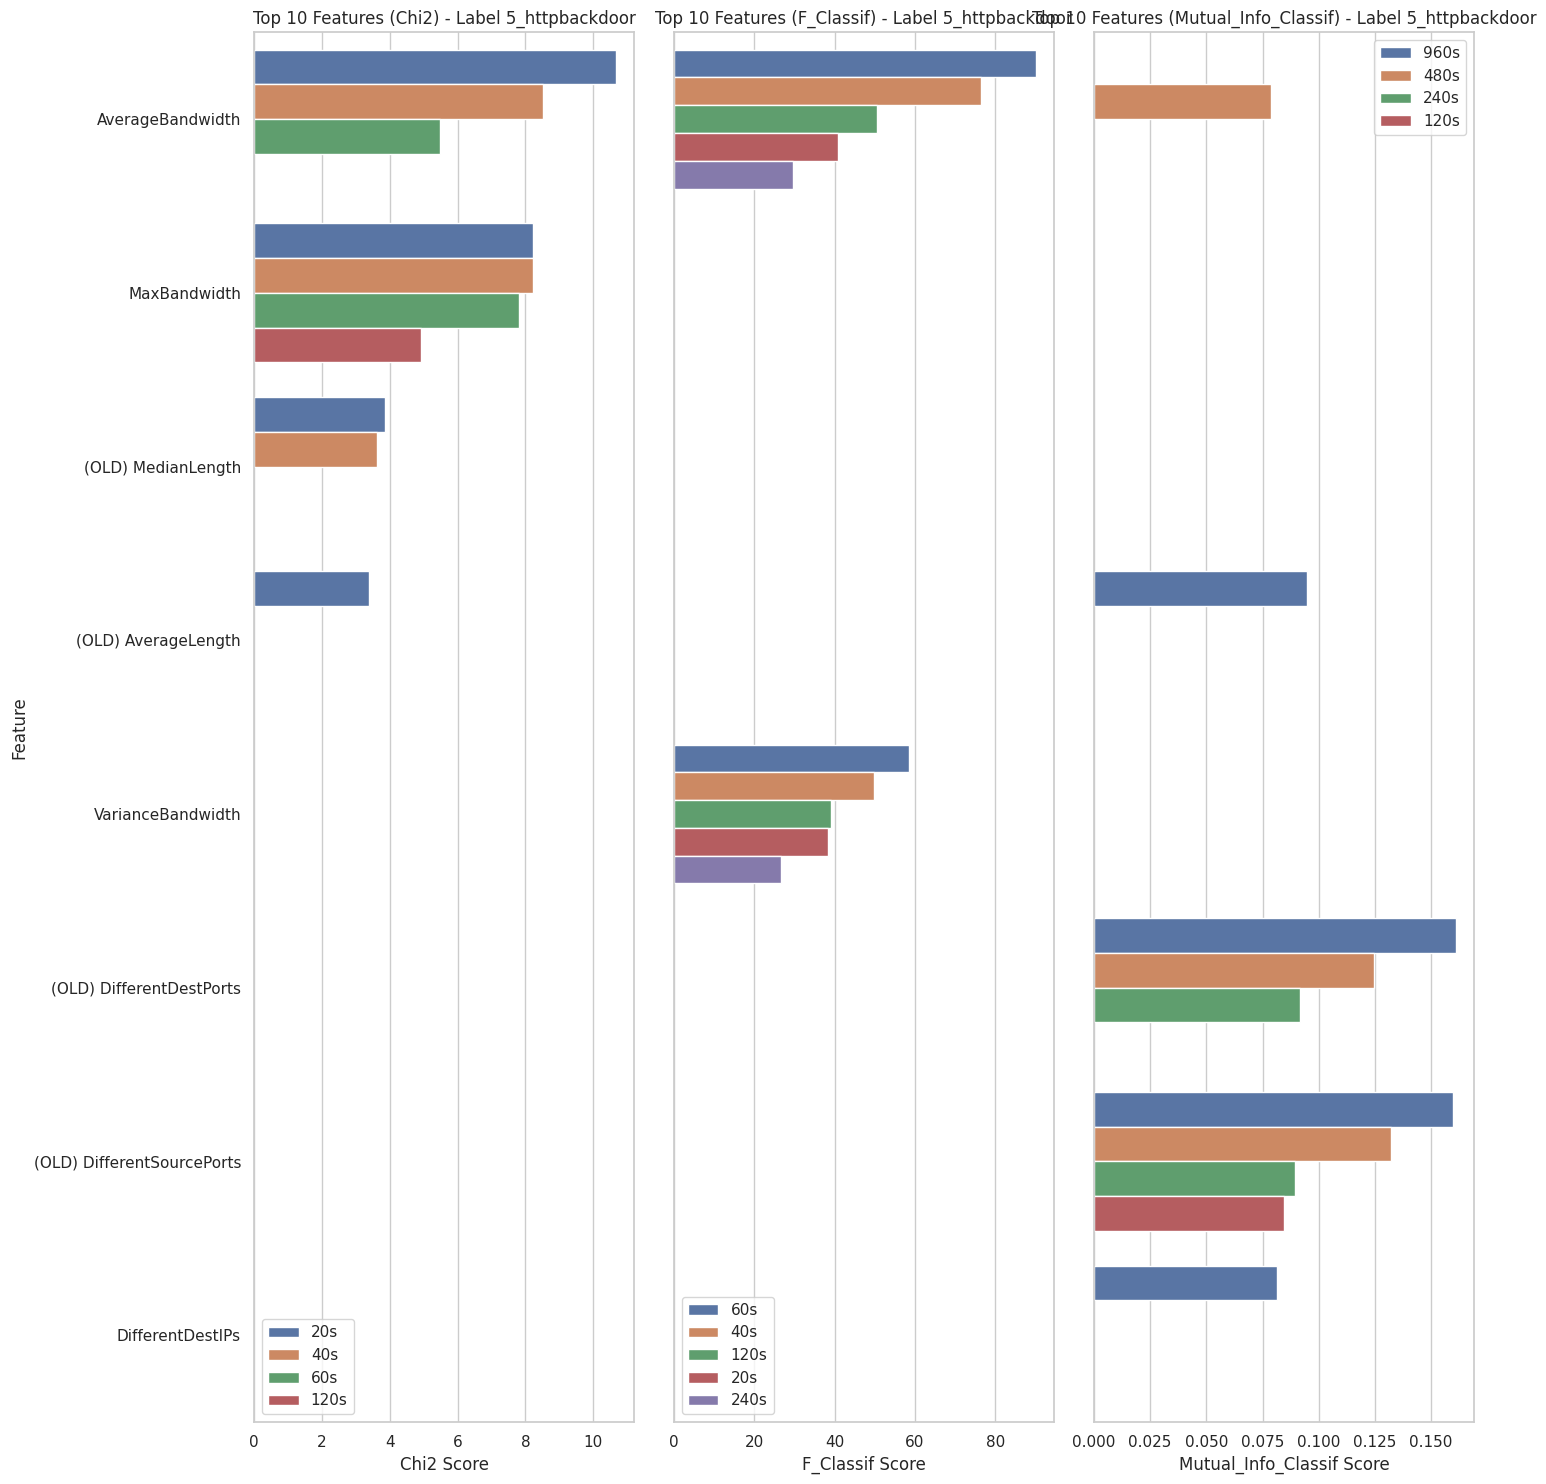

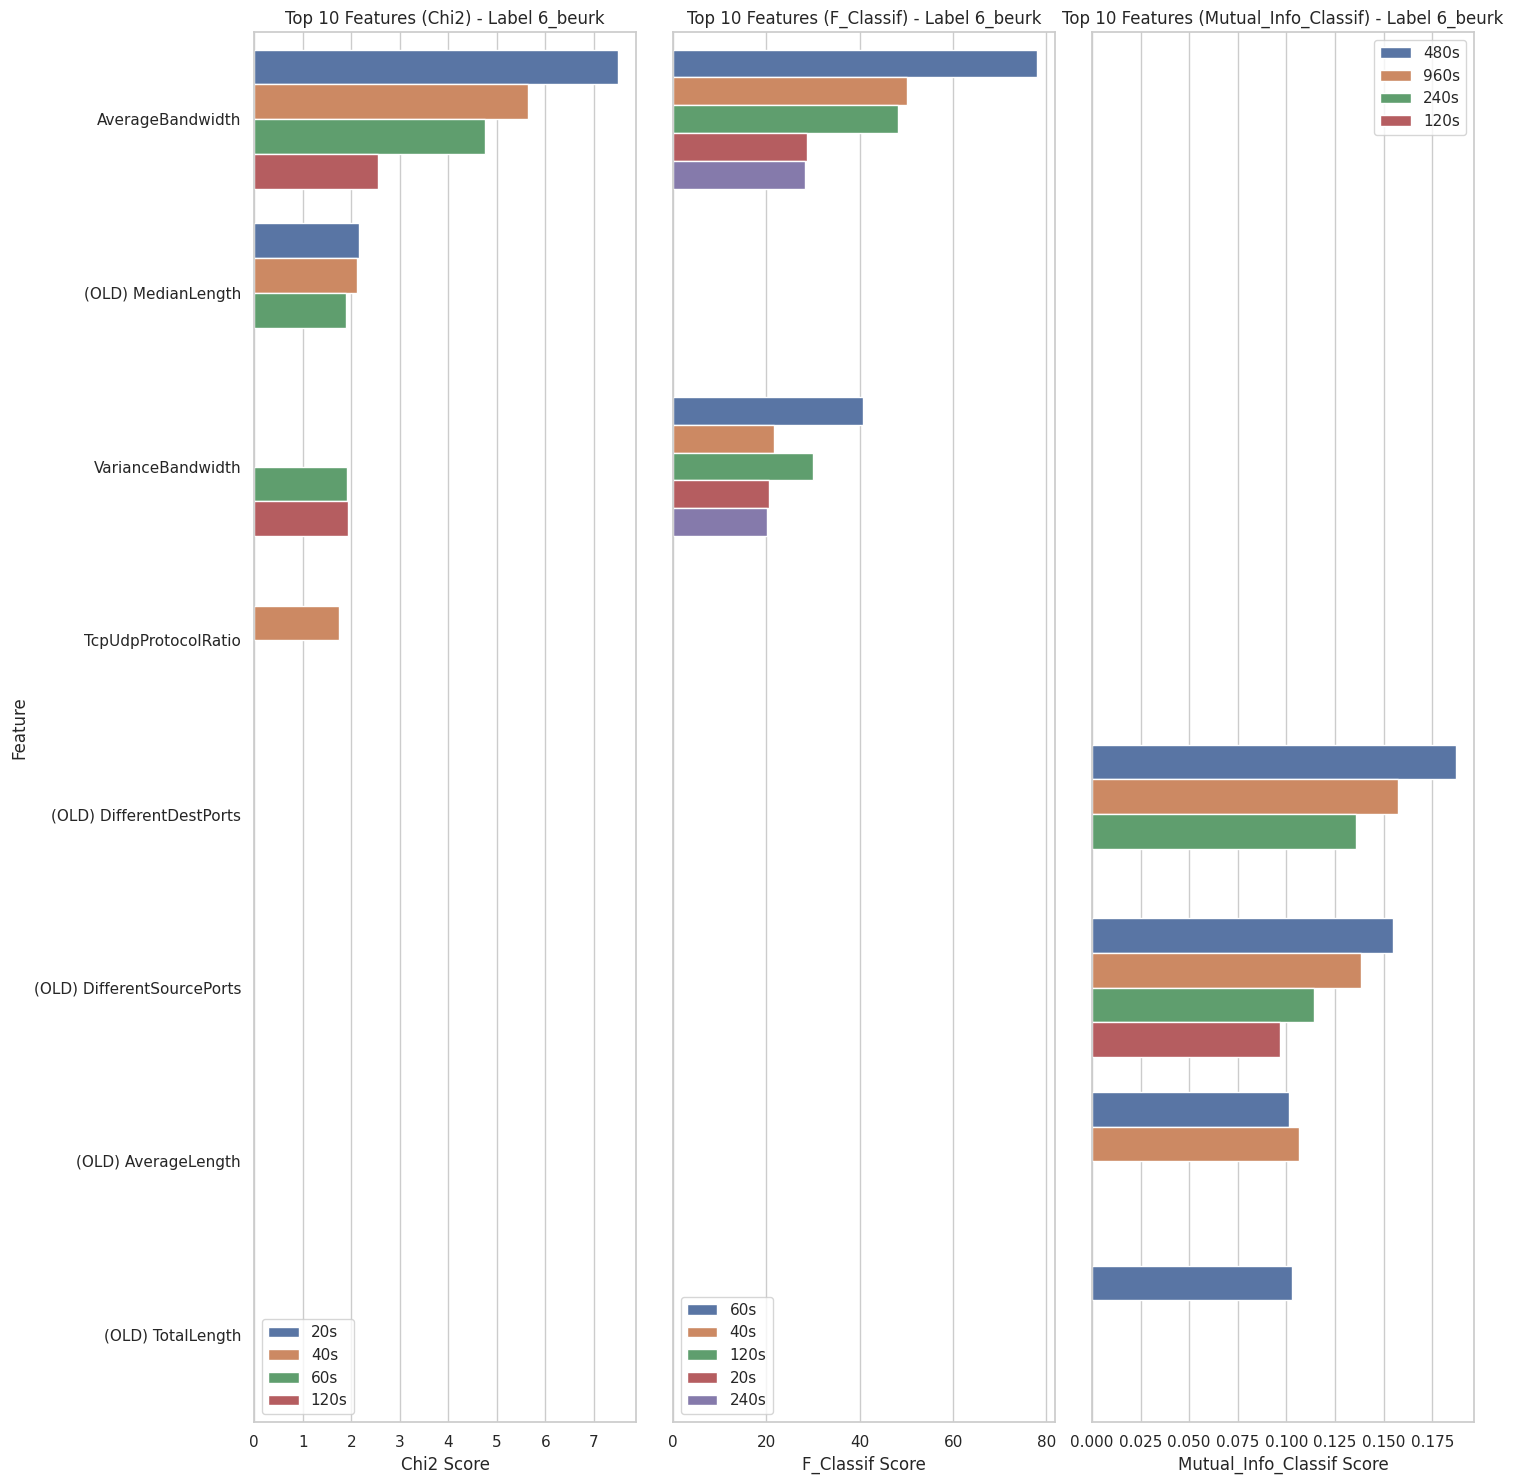

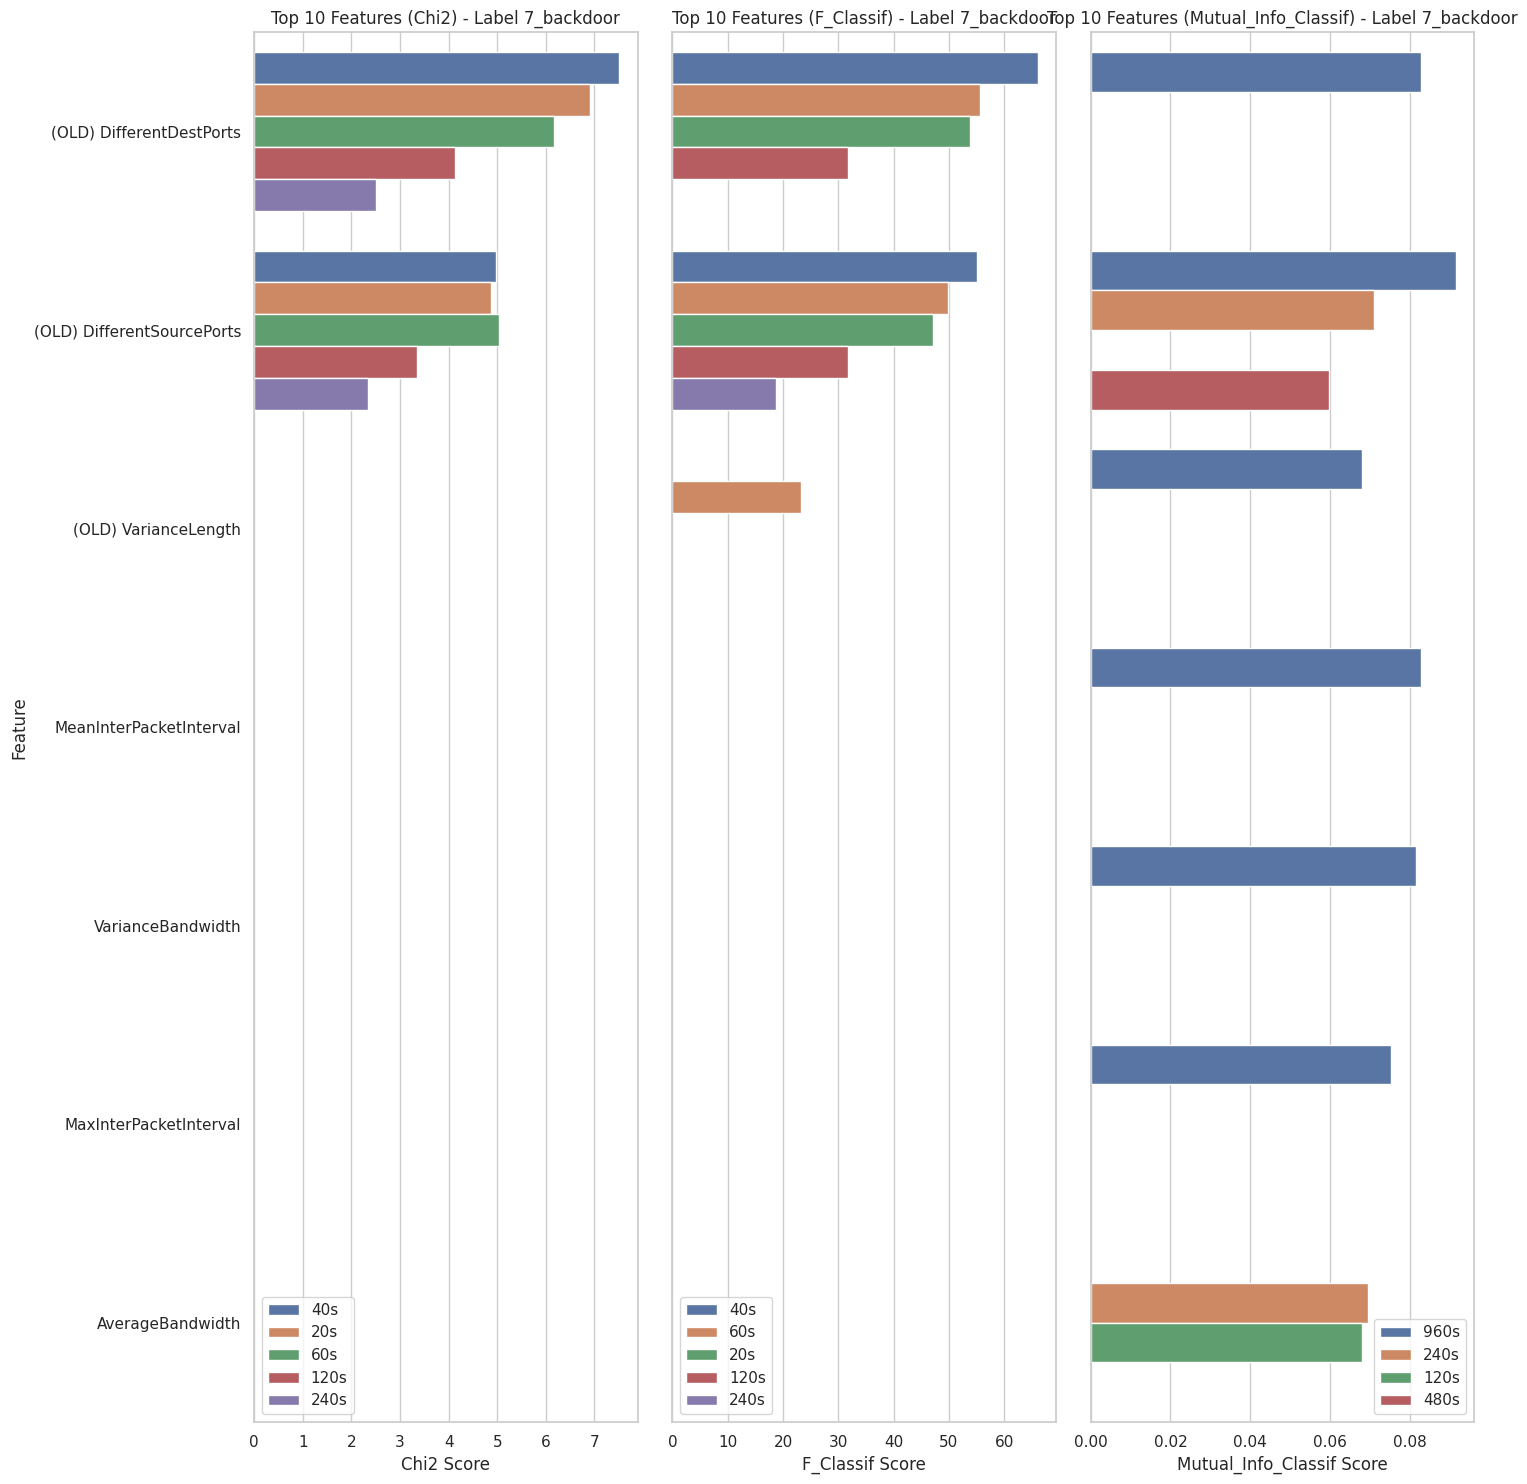

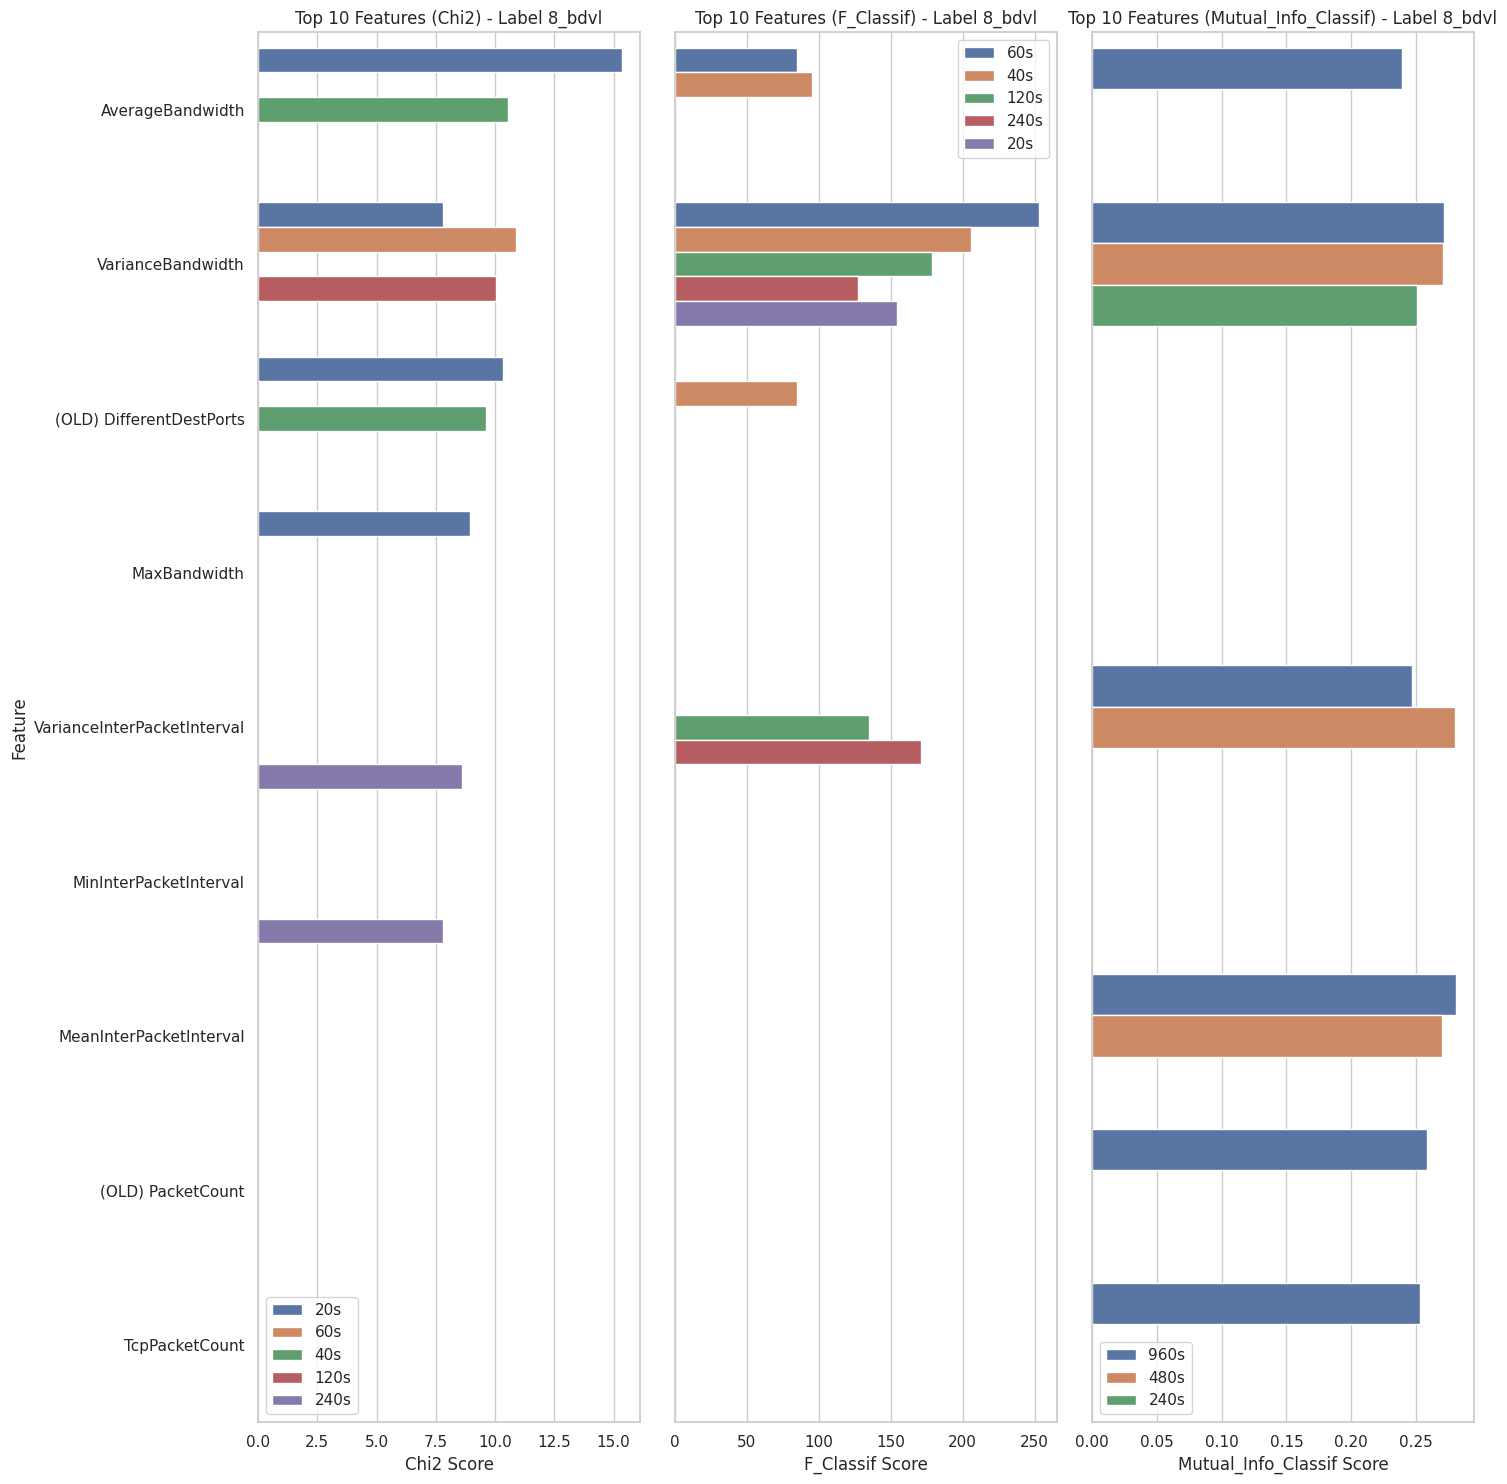

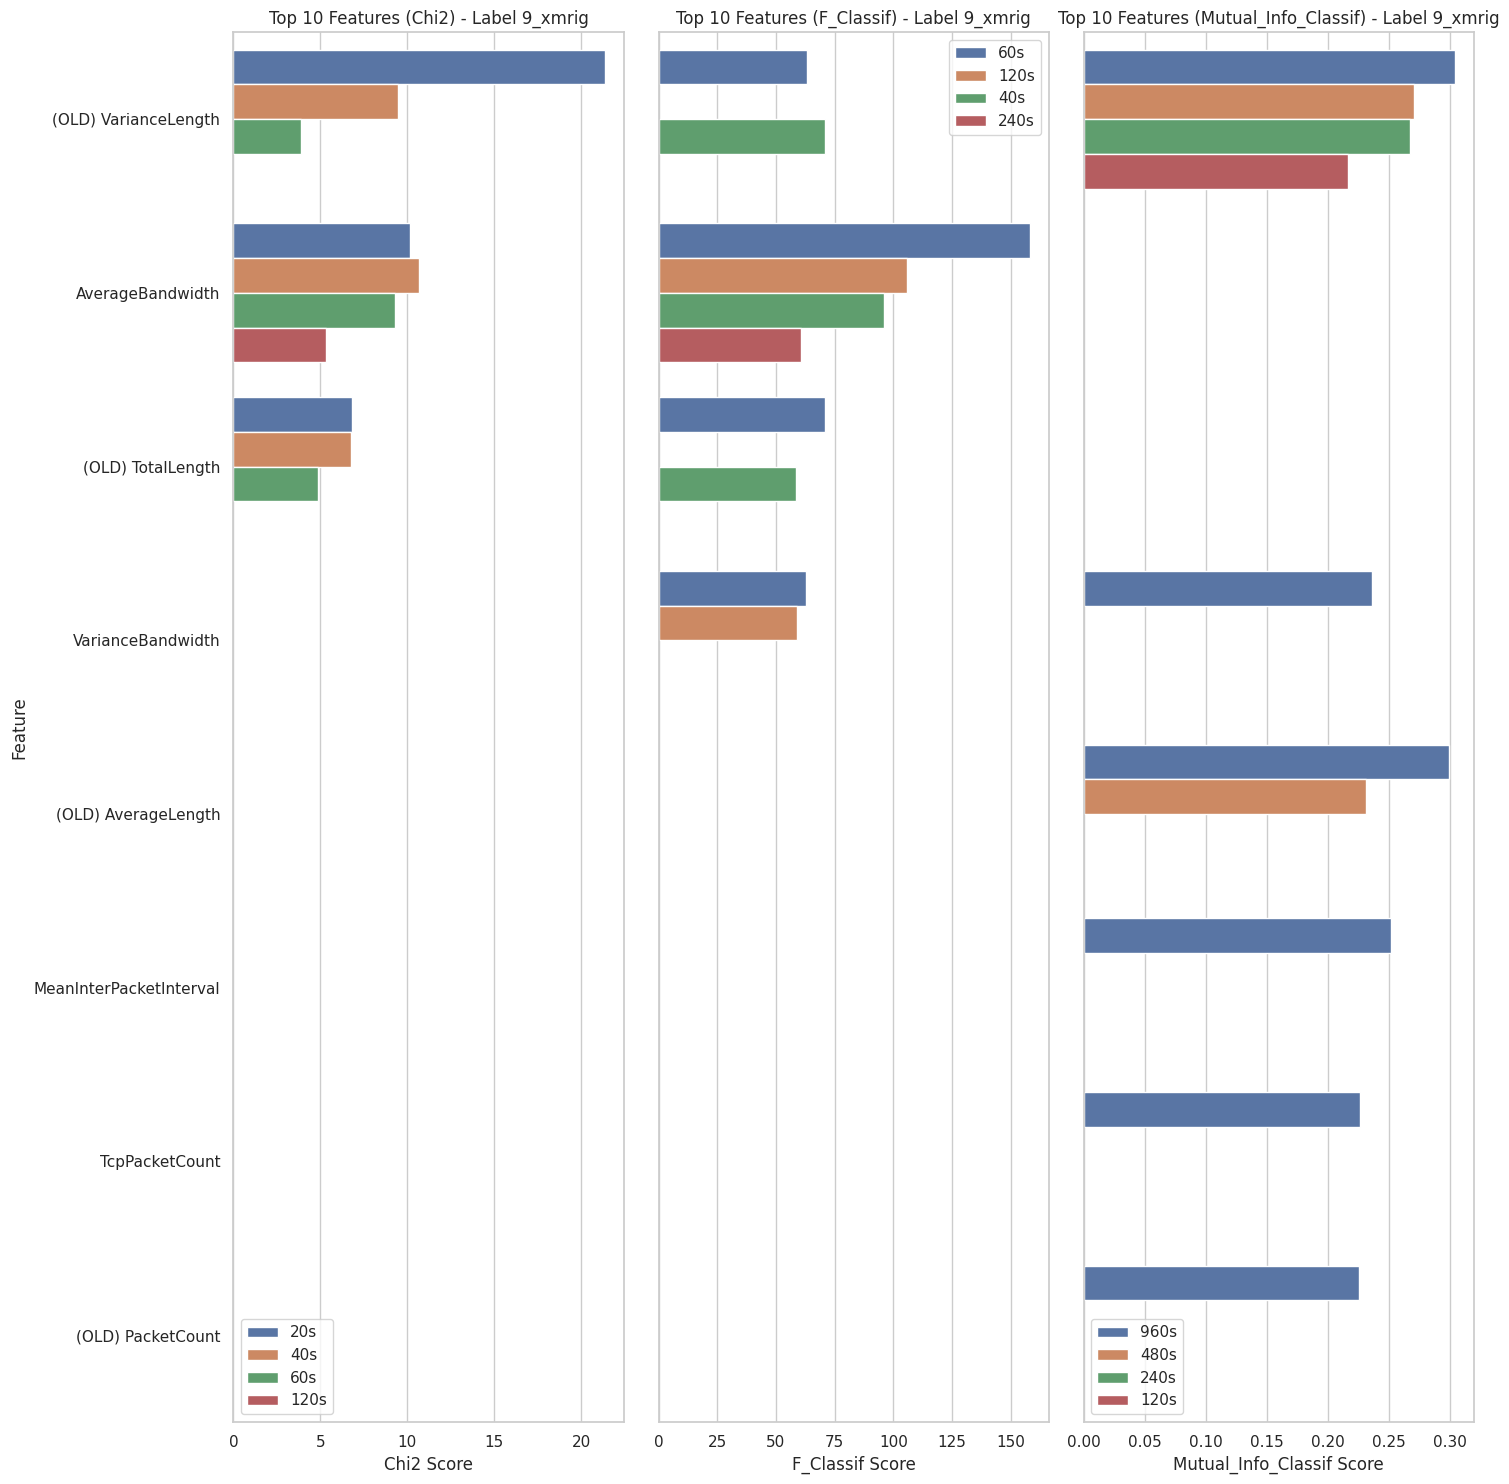

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plots
sns.set(style="whitegrid")

# Define the number of top features to display
top_k = 10

# Iterate over each label
for label, group in df.groupby("label"):
    # Get the top features for each score type
    largest_chi = group.nlargest(top_k, columns=["chi2"])
    largest_f_classif = group.nlargest(top_k, columns=["f_classif"])
    largest_mutual_info_classif = group.nlargest(top_k, columns=["mutual_info_classif"])

    # Create subplots for each label
    fig, axes = plt.subplots(1, 3, figsize=(15, 15), sharey=True)

    # Plot top features for each score type
    sns.barplot(x="chi2", y="feature", data=largest_chi, hue="time_window", ax=axes[0])
    sns.barplot(x="f_classif", y="feature", data=largest_f_classif, hue="time_window", ax=axes[1])
    sns.barplot(x="mutual_info_classif", y="feature", data=largest_mutual_info_classif, hue="time_window", ax=axes[2])

    # Set titles and labels
    axes[0].set_title(f'Top {top_k} Features (Chi2) - Label {label}')
    axes[0].set_ylabel('Feature')
    axes[0].set_xlabel('Chi2 Score')
    axes[1].set_title(f'Top {top_k} Features (F_Classif) - Label {label}')
    axes[1].set_ylabel('')
    axes[1].set_xlabel('F_Classif Score')
    axes[2].set_title(f'Top {top_k} Features (Mutual_Info_Classif) - Label {label}')
    axes[2].set_ylabel('')
    axes[2].set_xlabel('Mutual_Info_Classif Score')

    # Add legend
    axes[0].legend()
    axes[1].legend()
    axes[2].legend()

    # Adjust layout
    plt.tight_layout()

    # Show plot
    plt.show()


In [16]:
top_k = 10

for label, group in df.groupby("label"):
    largest_chi = group.nlargest(top_k, columns=["chi2"])#[["chi2", "feature", "data_source"]]
    largest_f_classif = group.nlargest(top_k, columns=["f_classif"])#[["f_classif", "feature", "data_source"]]
    largest_mutual_info_classif = group.nlargest(top_k, columns=["mutual_info_classif"])#[["mutual_info_classif", "feature", "data_source"]]

    # largest_chi["score_type"] = "chi2"
    # largest_chi.rename(columns={"chi2": "score"}, inplace=True)

    # largest_f_classif["score_type"] = "f_classif"
    # largest_f_classif.rename(columns={"f_classif": "score"}, inplace=True)

    # largest_mutual_info_classif["score_type"] = "mutual_info_classif"
    # largest_mutual_info_classif.rename(columns={"mutual_info_classif": "score"}, inplace=True)

    largest = pd.concat([largest_chi, largest_f_classif, largest_mutual_info_classif])


In [17]:
top_k = 10

largest_dfs = []
for label, group in df.groupby("label"):
    largest_chi = group.nlargest(top_k, columns=["chi2"])
    largest_f_classif = group.nlargest(top_k, columns=["f_classif"])
    largest_mutual_info_classif = group.nlargest(top_k, columns=["mutual_info_classif"])

    largest = pd.concat([largest_chi, largest_f_classif, largest_mutual_info_classif])
    largest_dfs.append(largest)

largest = pd.concat(largest_dfs)

In [19]:
largest.shape, df.shape

((270, 6), (1413, 6))

In [18]:
print(largest["time_window"].unique())

['20s' '40s' '60s' '120s' '960s' '480s' '240s']


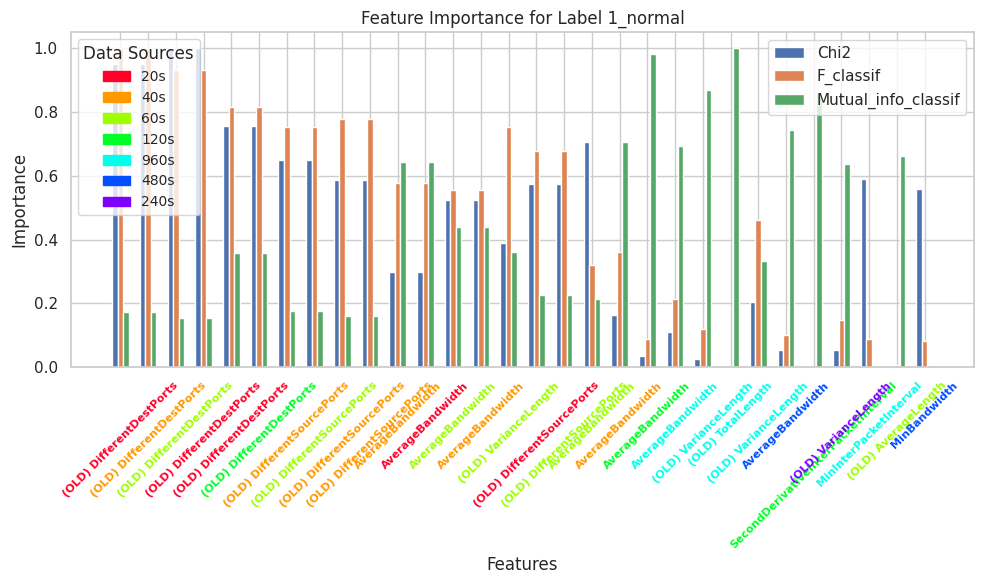

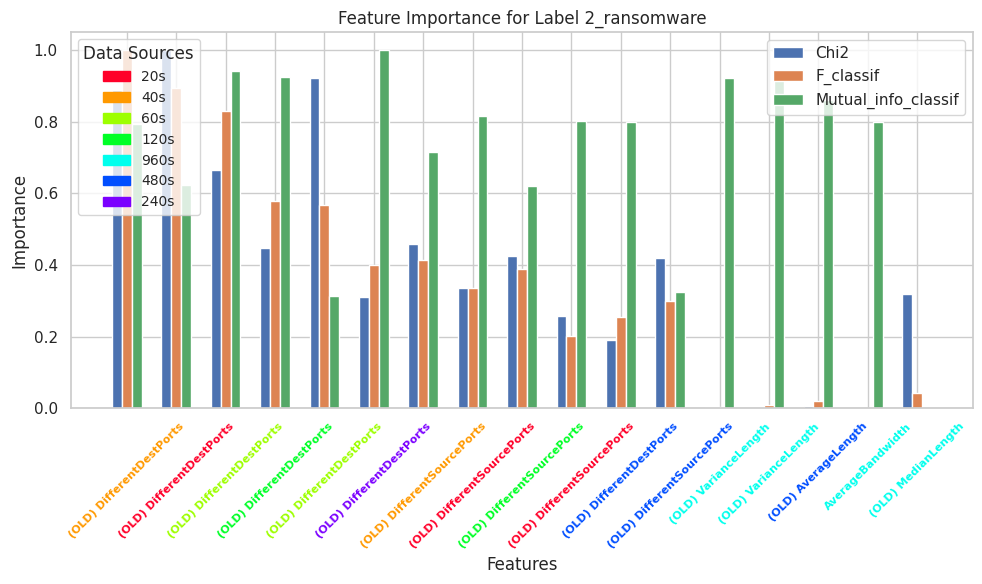

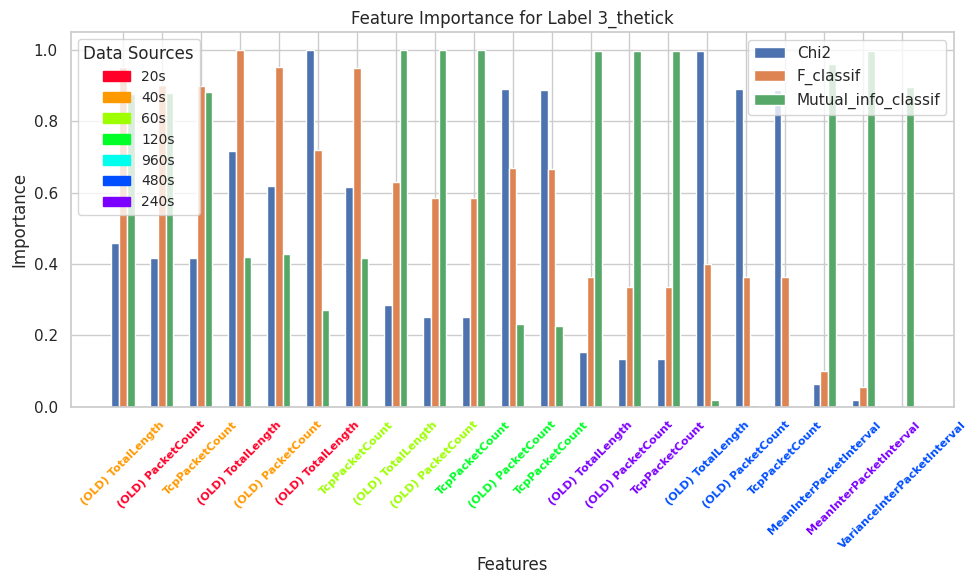

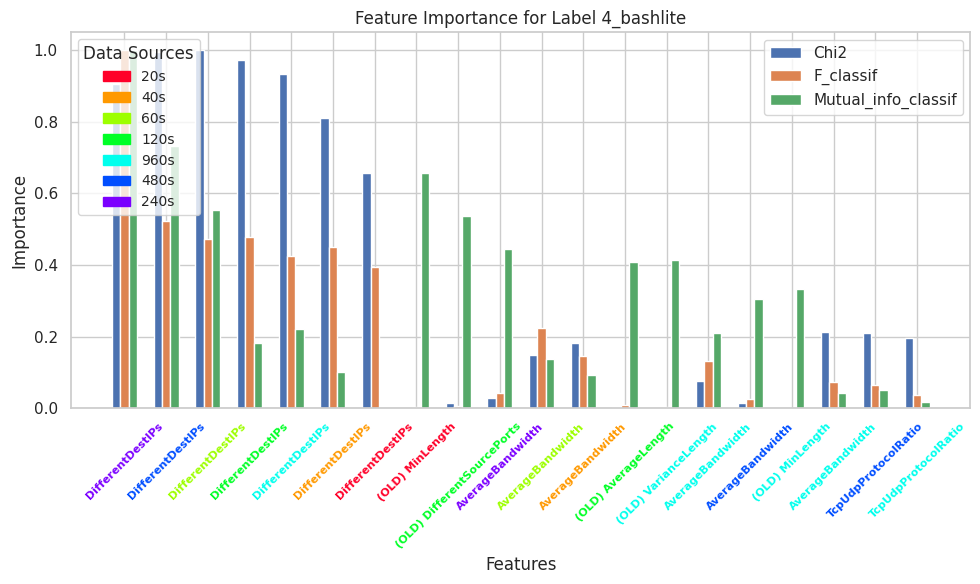

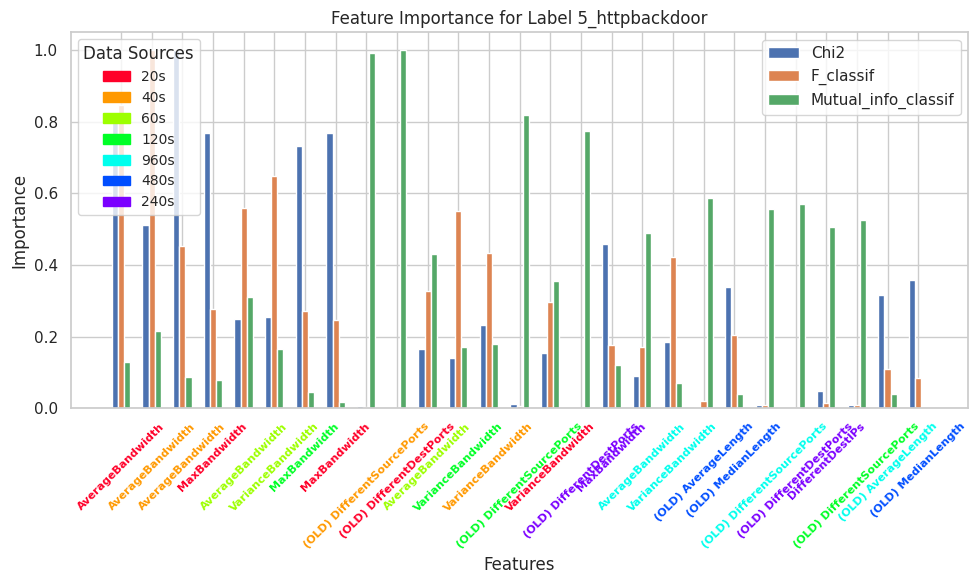

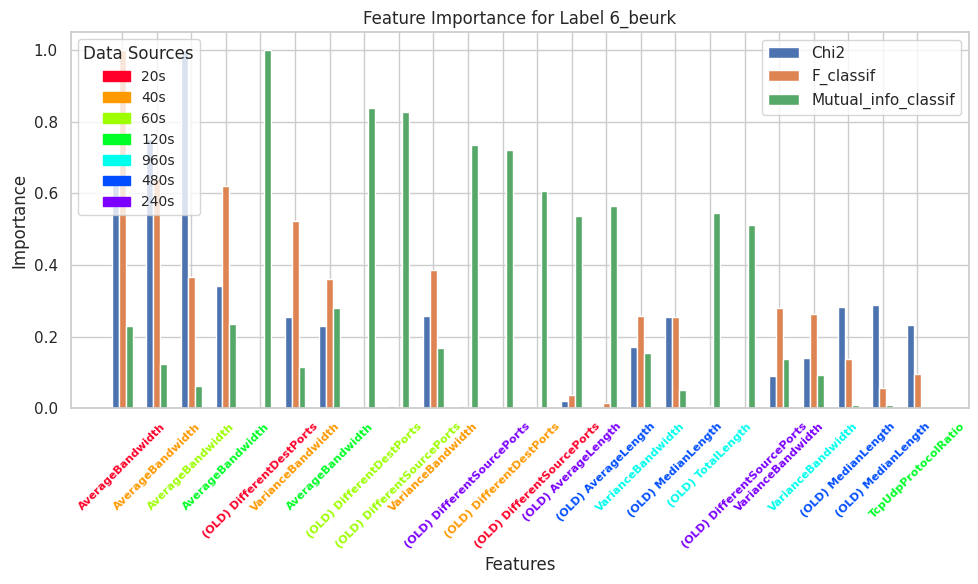

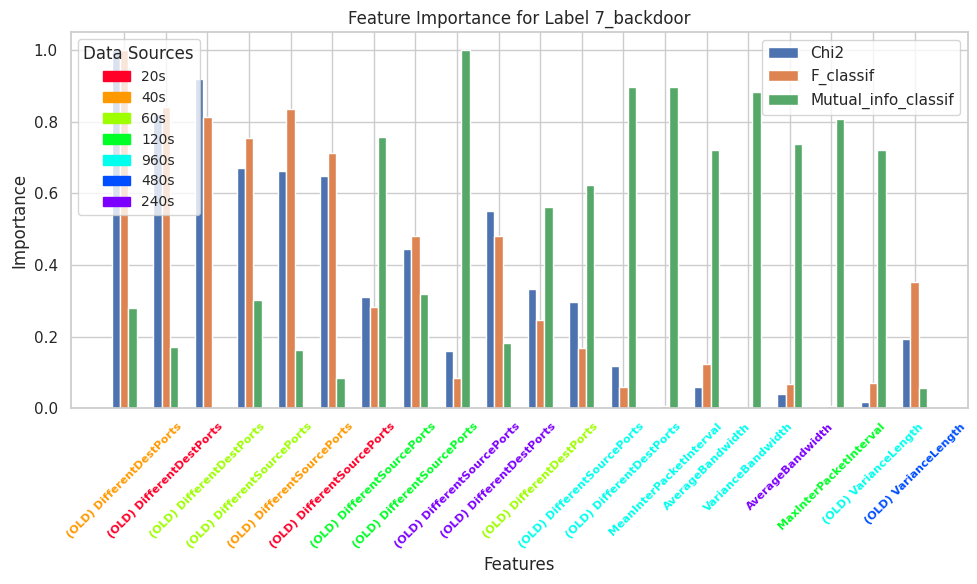

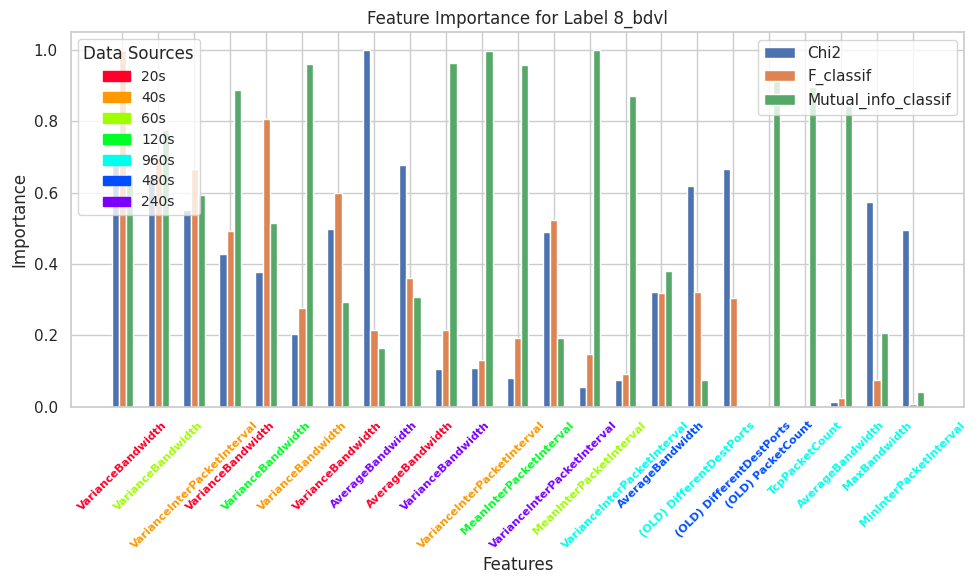

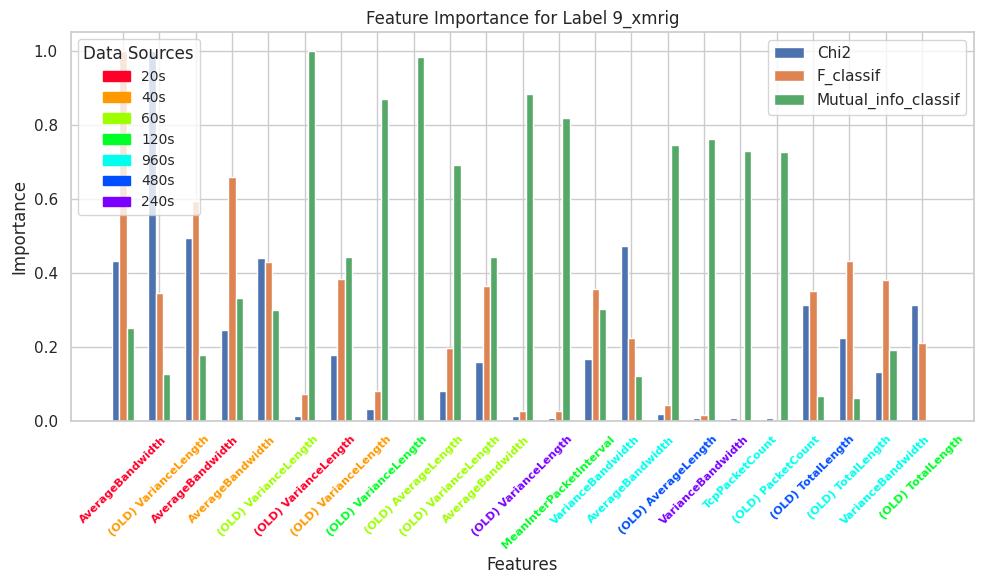

{'20s': (1.0, 0.0, 0.16, 1.0), '40s': (1.0, 0.6009538950715422, 0.0, 1.0), '60s': (0.6147323794382618, 1.0, 0.0, 1.0), '120s': (0.0, 1.0, 0.14758591608686492, 1.0), '960s': (0.0, 1.0, 0.9276829011174367, 1.0), '480s': (0.0, 0.3058397271952257, 1.0, 1.0), '240s': (0.4827365728900258, 0.0, 1.0, 1.0)}


In [20]:
import matplotlib.pyplot as plt

# Assuming 'largest' DataFrame contains the top features selected by all methods
# 'largest' DataFrame should have columns: 'feature', 'chi2', 'f_classif', 'mutual_info_classif', 'label'
num_unique_sources = len(largest["time_window"].unique())
# https://matplotlib.org/stable/users/explain/colors/colormaps.html
palette = plt.get_cmap('gist_rainbow')
data_source_colors = {}
for i, source in enumerate(largest["time_window"].unique()):
    data_source_colors[source] = palette(i / num_unique_sources)

# Iterate over unique labels in the 'largest' DataFrame
for label in largest['label'].unique():
    # Filter the DataFrame for the current label
    label_data = largest[largest['label'] == label].copy()
    label_data.reset_index(drop=True, inplace=True)

    label_data = feature_plotting.minmax_scale_features(label_data,
                                                               remove_outliers_iqr_all_columns=False,
                                                               cols_to_exclude_from_scaling=["feature", "label","time_window"])
    
    label_data["mean"] = label_data[["chi2", "f_classif", "mutual_info_classif"]].mean(axis=1)
    label_data.sort_values(by="mean", ascending=False, inplace=True)

    largest.drop_duplicates(inplace=True)

    # Extract feature names and importance scores for each method
    features = label_data['feature']
    chi2_scores = label_data['chi2']
    f_classif_scores = label_data['f_classif']
    mutual_info_scores = label_data['mutual_info_classif']
    
    # Set the position for the bars
    x = range(len(features))
    
    # Plotting the importance of features for the current label using bar plot
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    plt.bar(x, chi2_scores, width=0.2, align='center', label='Chi2')
    plt.bar([pos + 0.2 for pos in x], f_classif_scores, width=0.2, align='center', label='F_classif')
    plt.bar([pos + 0.4 for pos in x], mutual_info_scores, width=0.2, align='center', label='Mutual_info_classif')
    
    # Add labels and title
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.title(f'Feature Importance for Label {label}')

    plt.xticks([pos + 0.2 for pos in x], features, rotation=45)  # Rotate x-axis labels for better readability
    
    # Add legend for data source colors
    handles = [plt.Rectangle((0,0),1,1, color=data_source_colors[source]) for source in data_source_colors]
    labels = data_source_colors.keys()
    legend_old = plt.legend(handles, labels, title='Data Sources', loc='upper left', fontsize='small')

    ax = plt.gca()
    for i, tick in enumerate(ax.get_xticklabels()):
        data_source = label_data.loc[i, "time_window"]
        if data_source in data_source_colors:
            tick.set_color(data_source_colors[data_source])
            tick.set_fontsize(8)
            # bold
            tick.set_fontweight(800)

    plt.legend(loc='upper right')
    plt.gca().add_artist(legend_old)
    # Show plot
    plt.tight_layout()
    plt.show()

print(data_source_colors)


In [21]:
print(largest["time_window"].value_counts())

time_window
960s    40
20s     28
40s     27
60s     26
120s    26
480s    26
240s    24
Name: count, dtype: int64
